# Generalized Linear Regression

## Import and Prepare the Data

[pandas](https://pandas.pydata.org/) provides excellent data reading and querying module,[dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which allows you to import structured data and perform SQL-like queries. 

Here we imported some house price records from [Trulia](https://www.trulia.com/?cid=sem|google|tbw_br_nat_x_x_nat!53f9be4f|Trulia-Exact_352364665_22475209465_aud-278383240986:kwd-1967776155_260498918114_). For more about extracting data from Trulia, please check [my previous tutorial](https://www.youtube.com/watch?v=qB418v3k2vk).


We used the house prices as the [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) and the lot size, house area, the number of bedrooms and the number of bathrooms as the [independent variables](https://en.wikipedia.org/wiki/Dependent_and_independent_variables). 

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np

df = pandas.read_excel('house_price.xlsx')

# combine multipl columns into a 2D array
X = np.column_stack((df.lot_size,df.area,df.bedroom,df.bathroom)) 
y = df.price
print (X[:10])

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 , random_state=3) 



[[ 10018   1541      3      2]
 [  8712   1810      4      2]
 [ 13504   1456      3      2]
 [ 10130   2903      5      4]
 [ 18295   2616      3      2]
 [204732   3850      3      2]
 [  9147   1000      3      1]
 [  2300    920      2      2]
 [ 13939   2705      3      3]
 [  2291   1440      4      3]]


## Ordinary Least Squares

We used a [multiple linear regression model](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) to learn the data and test the [R squares](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) on the training data and the test data.

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training R Square: {:.2f}".format(lr.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [2.12812203e-01 4.09817896e+01 1.34769478e+04 4.47428552e+04]
lr.intercept_: 16022.125347000547
Training R Square: 0.96
Test R Square: 0.71


The model reported the coefficients of all features, and the R square on the training data is good. However, the R square of the testing data is much lower, indicating an [overfitting](https://en.wikipedia.org/wiki/Overfitting) situation. 

## Ridge Regression

[Ridge Regression](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) reduces the complexity of linear models by imposing a penalty on the size of coefficients to push all coefficients close to 0.

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training R Square: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge.score(X_test, y_test)))

Training R Square: 0.96
Test R Square: 0.72


We can increase the alpha to push all coefficients closer to 0.

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) # set different aphpa
print("Training R Square: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge10.score(X_test, y_test)))

Training R Square: 0.95
Test R Square: 0.75


In [37]:
ridge1000 = Ridge(alpha=1000).fit(X_train, y_train)
print("Training R Square: {:.2f}".format(ridge1000.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge1000.score(X_test, y_test)))

Training R Square: 0.93
Test R Square: 0.79


We can visually compare the coefficients from the Ridge Regression models with different alpha.

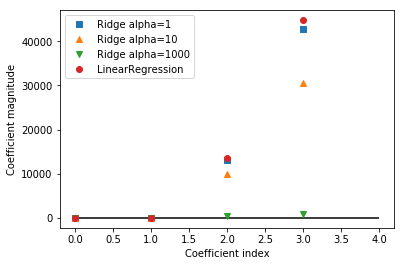

In [38]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge1000.coef_, 'v', label="Ridge alpha=1000")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

## Lasso Regression

[Lasso](http://scikit-learn.org/stable/modules/linear_model.html#lasso) is another model that estimates sparse coefficients by push some coefficients to 0, i.e., reduce the number of coefficients.

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
# here we also report the number of coefficients
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

Training set score: 0.96
Test set score: 0.71
Number of features used: 4


We can also adjust the alpha to push some coefficients closer to 0.

In [40]:
lasso10 = Lasso(alpha=10).fit(X_train, y_train) #set different alpha
print("Training R Square: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0)))

Training R Square: 0.96
Test R Square: 0.71
Number of features used: 4


In [41]:
lasso10000 = Lasso(alpha=10000, ).fit(X_train, y_train)
print("Training R Square: {:.2f}".format(lasso10000.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lasso10000.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10000.coef_ != 0)))

Training R Square: 0.95
Test R Square: 0.73
Number of features used: 3


We can also check the coefficients from the Lasso Regression models with different alpha.

Text(0,0.5,'Coefficient magnitude')

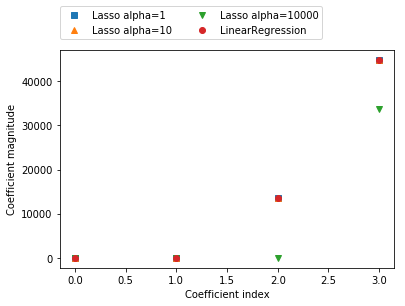

In [42]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso10.coef_, '^', label="Lasso alpha=10")
plt.plot(lasso10000.coef_, 'v', label="Lasso alpha=10000")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")